## EDA completo - Práctica Final

##### Vamos a trabajar con el siguiente dataset: https://raw.githubusercontent.com/mdlstudioar/datosoct/main/IATAinfo%20(2)


### 1. Importar las librerías y módulos que vayamos a necesitar:

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px

/Users/magalidominguezlalli/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Para chequear versiones:

np.__version__

'1.23.0'

### 2. Vamos a acceder al dataset:

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/mdlstudioar/datosoct/main/IATAinfo%20(2)")
df

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,scheduled_service
0,6523,00A,heliport,Total Rf Heliport,40.070801,-74.933601,11.0,NoA,US,US-PA,no
1,323361,00AA,small_airport,Aero B Ranch Airport,38.704022,-101.473911,3435.0,NoA,US,US-KS,no
2,6524,00AK,small_airport,Lowell Field,59.947733,-151.692524,450.0,NoA,US,US-AK,no
3,6525,00AL,small_airport,Epps Airpark,34.864799,-86.770302,820.0,NoA,US,US-AL,no
4,6526,00AR,closed,Newport Hospital & Clinic Heliport,35.608700,-91.254898,237.0,NoA,US,US-AR,no
...,...,...,...,...,...,...,...,...,...,...,...
67307,46378,ZZ-0001,heliport,Sealand Helipad,51.894444,1.482500,40.0,EU,GB,GB-ENG,no
67308,307326,ZZ-0002,small_airport,Glorioso Islands Airstrip,-11.584278,47.296389,11.0,AF,TF,TF-U-A,no
67309,346788,ZZ-0003,small_airport,Fainting Goat Airport,32.110587,-97.356312,690.0,NoA,US,US-TX,no
67310,342102,ZZZW,closed,Scandium City Heliport,69.355287,-138.939310,4.0,NoA,CA,CA-YT,no


### 3. Vamos a hacer el data cleaning

In [4]:
# chequeamos si tenemos valores faltantes y cuáles son

df.isnull().sum()

id                       0
ident                    1
type                     0
name                     0
latitude_deg             0
longitude_deg            0
elevation_ft         12977
continent                0
iso_country            257
iso_region               0
scheduled_service        0
dtype: int64

In [5]:
# chequeamos cuánto representa cada uno de esos valores faltantes
df.isnull().sum()/df.shape[0]*100

id                    0.000000
ident                 0.001486
type                  0.000000
name                  0.000000
latitude_deg          0.000000
longitude_deg         0.000000
elevation_ft         19.278880
continent             0.000000
iso_country           0.381804
iso_region            0.000000
scheduled_service     0.000000
dtype: float64

**¿Qué debo preguntarme al manejar datos faltantes?**

- ¿Quiero conservar la información?
- ¿Qué tipo de datos tengo en la columna que voy a imputar?
- ¿Por qué puede ser que tengo los valores faltantes?:
    - Valores faltantes al azar
    - Valores faltantes no al azar
    
    
**¿Cómo decido qué hago con los valores faltantes?**

- Entender que no hay una manera _perfecta_ de manejar los valores faltantes.

- Depende de mis datos

- Observar no solo la cantidad de datos faltantes sino también su patrón.

- Estrategias:  
     - **Eliminar los valores (fila)**:
        - Si la recogida de datos no se ha realizado de forma aleatoria introduce sesgo.  
        - En el caso de que haya mucho patrones con datos faltantes, podría reducir considerablemente la cantidad de filas disponibles. 
     - **Eliminación de la variable (columna)**:
         - Las variables “descartadas” podrían contener información de vital importancia.      
     - **Imputar los valores**:
        - Sustituir por media o mediana: solo en variables numéricas  
        - Sustituir por valor más frecuente: útil para variables categóricas
        - Algoritmo de ML: K-NN (k-nearest neighboors)

Si optamos por eliminar los datos (variable **ident** cuyo número de valores faltantes 1 (uno)), podemos hacerlo usando la siguiente función:
    
`.dropna(self, axis=0, how='any', thresh=None, subset=None, inplace=False)`

- **axis**: {0, 1}, default 0. 0: Filas, 1: Columnas
- **how**: {'any', 'all'}, default 'any'. Any: Si hay un valor faltante elimina la columna o fila. All: Si todos los valores de la fila o columna son faltantes, elimina la fila o columna.
- **thresh**: (int) requiere de un mínimo de valores no-faltantes.
- **subset**: Nombre de filas o columnas donde buscar valores faltantes
- **inplace**: True modifica el DataFrame original

[documentación](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html)




In [6]:
df.dropna(subset=["ident"], axis=0, how="any", inplace=True)

In [7]:
df.isnull().sum()

id                       0
ident                    0
type                     0
name                     0
latitude_deg             0
longitude_deg            0
elevation_ft         12977
continent                0
iso_country            257
iso_region               0
scheduled_service        0
dtype: int64

In [8]:
df["ident"].isnull().sum()

0

Si optamos por imputar los valores (variable **elevation_ft** cuyo % de valores faltantes es casi el 20), deberemos chequear primero el tipo de dato y su forma:


In [9]:
df["elevation_ft"].dtype

dtype('float64')

In [10]:
df["elevation_ft"].mean()

1268.643335664593

In [11]:
# con el método fillna

df["elevation_ft"].fillna(df["elevation_ft"].mean().__round__(0))

0          11.0
1        3435.0
2         450.0
3         820.0
4         237.0
          ...  
67307      40.0
67308      11.0
67309     690.0
67310       4.0
67311     338.0
Name: elevation_ft, Length: 67311, dtype: float64

Hay una clase dentro de la librería *sklearn* que permite hacer algo igual:

`sklearn.impute.SimpleImputer(missing_values=nan, strategy=’mean’, fill_value=None, copy=True, add_indicator=False)`
    
- **missing_values**: Indica cómo son representados los valores faltantes (np.nan es el estándard)
- **strategy**: `mean`, `median`, `most_frequent`, `constant`.
- **fill_value**: Si uso `constant`, puedo usar `fill_value` para indicar por cuál valor debe ser reemplazado
- **copy**: Si pongo True, crea una copia de X
- **add_indicator**: Agrega un indicador para los valores faltantes.


[documentación](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer)

In [12]:
from sklearn.impute import SimpleImputer

In [13]:
imputer = SimpleImputer(missing_values=np.nan, strategy="mean")
imp_elevation_ft = imputer.fit_transform(df[['elevation_ft']])
df["elevation_ft"] = imp_elevation_ft

In [14]:
df.isnull().sum()

id                     0
ident                  0
type                   0
name                   0
latitude_deg           0
longitude_deg          0
elevation_ft           0
continent              0
iso_country          257
iso_region             0
scheduled_service      0
dtype: int64

In [15]:
df["elevation_ft"].isnull().sum()

0

Nos queda **iso_country**

In [16]:
df["iso_country"]

0        US
1        US
2        US
3        US
4        US
         ..
67307    GB
67308    TF
67309    US
67310    CA
67311    JP
Name: iso_country, Length: 67311, dtype: object

In [17]:
df["iso_country"].dtype

dtype('O')

In [18]:
df["iso_country"].value_counts()

US    27261
BR     5970
CA     2854
JP     2580
AU     2054
      ...  
GM        1
NU        1
JE        1
BL        1
NF        1
Name: iso_country, Length: 243, dtype: int64

In [19]:
for i in df["continent"].unique():
    print(i)
    print(df[df["continent"] == i].isnull().sum())
    print()

NoA
id                   0
ident                0
type                 0
name                 0
latitude_deg         0
longitude_deg        0
elevation_ft         0
continent            0
iso_country          0
iso_region           0
scheduled_service    0
dtype: int64

OC
id                   0
ident                0
type                 0
name                 0
latitude_deg         0
longitude_deg        0
elevation_ft         0
continent            0
iso_country          0
iso_region           0
scheduled_service    0
dtype: int64

AF
id                     0
ident                  0
type                   0
name                   0
latitude_deg           0
longitude_deg          0
elevation_ft           0
continent              0
iso_country          257
iso_region             0
scheduled_service      0
dtype: int64

AN
id                   0
ident                0
type                 0
name                 0
latitude_deg         0
longitude_deg        0
elevation_ft         0
con

In [20]:
df[df["continent"] == "AF"]["iso_country"].value_counts()

ZA    580
KE    376
CD    292
TZ    209
ZW    144
BW    132
AO    111
ZM    103
MZ     96
MG     84
EG     76
DZ     71
LY     66
SS     65
NG     63
ET     61
CG     56
BF     51
CF     47
GA     39
CM     39
SD     38
SO     38
UG     37
TD     37
MA     35
LS     33
ML     32
CI     30
MW     29
MR     27
NE     23
SC     21
EH     20
SN     20
LR     18
GH     17
SZ     16
GN     16
TN     16
SL     12
DJ     11
BJ     10
CV     10
ER      9
RW      9
GW      7
GQ      7
BI      7
TG      7
ST      4
KM      4
MU      4
SH      4
TF      3
RE      2
YT      1
GM      1
Name: iso_country, dtype: int64

In [21]:
imputer = SimpleImputer(missing_values=np.nan, strategy="constant", fill_value="ZA")
imp_iso_country = imputer.fit_transform(df[['iso_country']])
df["iso_country"] = imp_iso_country

In [22]:
df["iso_country"].isnull().sum()

0

In [23]:
df[df["continent"] == "AF"]["iso_country"].value_counts()

ZA    837
KE    376
CD    292
TZ    209
ZW    144
BW    132
AO    111
ZM    103
MZ     96
MG     84
EG     76
DZ     71
LY     66
SS     65
NG     63
ET     61
CG     56
BF     51
CF     47
GA     39
CM     39
SD     38
SO     38
UG     37
TD     37
MA     35
LS     33
ML     32
CI     30
MW     29
MR     27
NE     23
SC     21
EH     20
SN     20
LR     18
GH     17
SZ     16
GN     16
TN     16
SL     12
DJ     11
BJ     10
CV     10
ER      9
RW      9
GW      7
GQ      7
BI      7
TG      7
ST      4
KM      4
MU      4
SH      4
TF      3
RE      2
YT      1
GM      1
Name: iso_country, dtype: int64

In [24]:
df.isnull().sum()

id                   0
ident                0
type                 0
name                 0
latitude_deg         0
longitude_deg        0
elevation_ft         0
continent            0
iso_country          0
iso_region           0
scheduled_service    0
dtype: int64

### 4. ¿Qué preguntas nos hacemos?

#### 4.1 ¿Cuántos aeropuertos hay por continente?

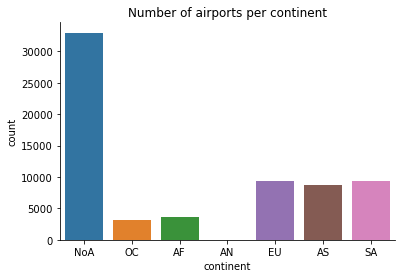

In [25]:
sns.countplot(x='continent',data=df).set_title('Number of airports per continent')
sns.despine()

#### 4.2 ¿Cuántos aeropuertos hay por Estado en USA?

In [26]:
US_airports=df[df['iso_country']=='US']
US_airports.head()

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,scheduled_service
0,6523,00A,heliport,Total Rf Heliport,40.070801,-74.933601,11.0,NoA,US,US-PA,no
1,323361,00AA,small_airport,Aero B Ranch Airport,38.704022,-101.473911,3435.0,NoA,US,US-KS,no
2,6524,00AK,small_airport,Lowell Field,59.947733,-151.692524,450.0,NoA,US,US-AK,no
3,6525,00AL,small_airport,Epps Airpark,34.864799,-86.770302,820.0,NoA,US,US-AL,no
4,6526,00AR,closed,Newport Hospital & Clinic Heliport,35.608700,-91.254898,237.0,NoA,US,US-AR,no


/var/folders/z5/gdq6qhyj7xj_gxgtfl5n5cz80000gn/T/ipykernel_11872/2257381703.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  US_airports.loc[:,"iso_region"]=US_airports.loc[:,"iso_region"].replace({'US-':''})


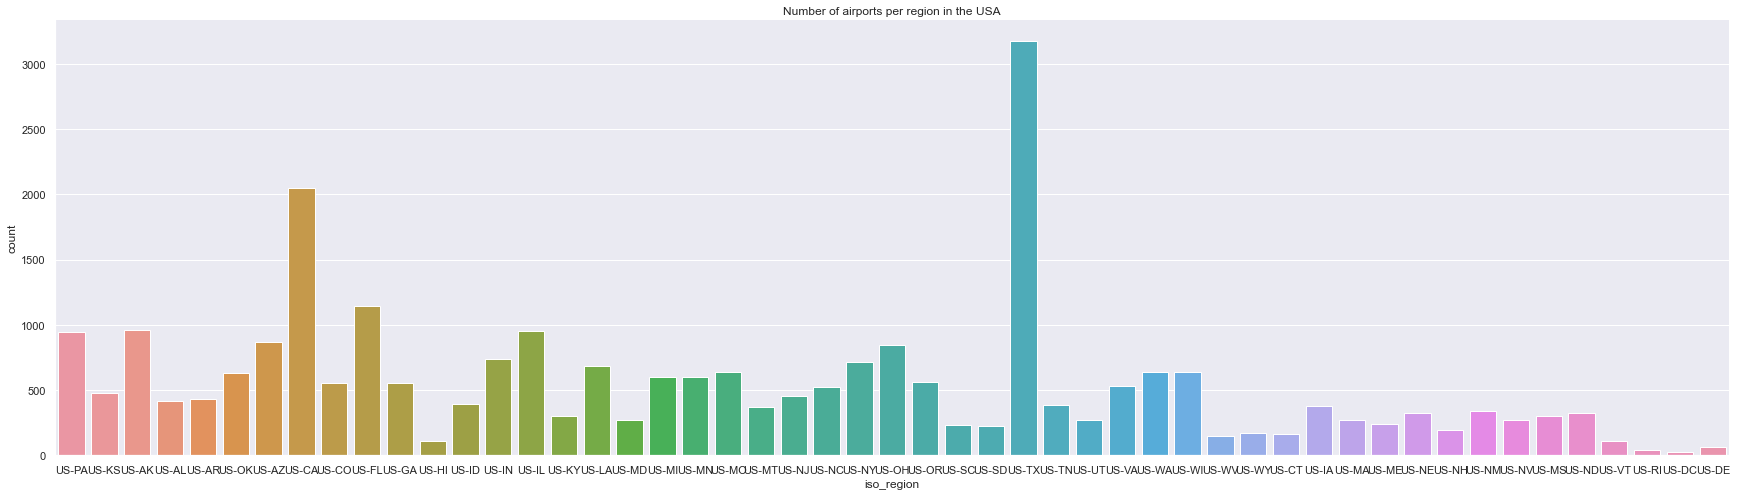

In [27]:
US_airports.loc[:,"iso_region"]=US_airports.loc[:,"iso_region"].replace({'US-':''})
## set figure size
sns.set(rc={'figure.figsize':(30,8)})
## seaborn title 
sns.countplot(x='iso_region',data=US_airports).set_title('Number of airports per region in the USA')
sns.despine()

#### 4.3 Informar cuántos aeropuertos hay de cada tipo en cada uno de los continentes en una tabla.

In [28]:
df["type"].value_counts()

small_airport     37079
heliport          16312
closed             7632
medium_airport     4554
seaplane_base      1076
large_airport       621
balloonport          37
Name: type, dtype: int64

In [29]:
dummy_types = pd.get_dummies(df["type"])

In [30]:
df_2 = pd.concat([df, dummy_types], axis=1)

In [31]:
df_2.drop(["type"], axis=1, inplace=True)

In [32]:
df_2

,id,ident,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,scheduled_service,balloonport,closed,heliport,large_airport,medium_airport,seaplane_base,small_airport
0,6523,00A,Total Rf Heliport,40.070801,-74.933601,11.0,NoA,US,US-PA,no,0,0,1,0,0,0,0
1,323361,00AA,Aero B Ranch Airport,38.704022,-101.473911,3435.0,NoA,US,US-KS,no,0,0,0,0,0,0,1
2,6524,00AK,Lowell Field,59.947733,-151.692524,450.0,NoA,US,US-AK,no,0,0,0,0,0,0,1
3,6525,00AL,Epps Airpark,34.864799,-86.770302,820.0,NoA,US,US-AL,no,0,0,0,0,0,0,1
4,6526,00AR,Newport Hospital & Clinic Heliport,35.608700,-91.254898,237.0,NoA,US,US-AR,no,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67307,46378,ZZ-0001,Sealand Helipad,51.894444,1.482500,40.0,EU,GB,GB-ENG,no,0,0,1,0,0,0,0
67308,307326,ZZ-0002,Glorioso Islands Airstrip,-11.584278,47.296389,11.0,AF,TF,TF-U-A,no,0,0,0,0,0,0,1
67309,346788,ZZ-0003,Fainting Goat Airport,32.110587,-97.356312,690.0,NoA,US,US-TX,no,0,0,0,0,0,0,1
67310,342102,ZZZW,Scandium City Heliport,69.355287,-138.939310,4.0,NoA,CA,CA-YT,no,0,1,0,0,0,0,0


In [33]:
pivote_1 = df_2.pivot_table(index=["continent"], aggfunc={
    "small_airport": sum, "heliport": sum,
    "closed": sum, "medium_airport": sum,
    "seaplane_base": sum, "large_airport":sum, 
    "balloonport": sum
})

In [34]:
pivote_1

,balloonport,closed,heliport,large_airport,medium_airport,seaplane_base,small_airport
continent,,,,,,,
AF,0,118.0,100.0,50,450.0,1.0,2914.0
AN,0,2.0,9.0,0,8.0,0.0,25.0
AS,0,763.0,4269.0,164,1195.0,41.0,2303.0
EU,7,1196.0,1419.0,153,944.0,29.0,5572.0
NoA,29,5160.0,8243.0,215,1242.0,992.0,17111.0
OC,0,135.0,332.0,16,312.0,11.0,2366.0
SA,1,258.0,1940.0,23,403.0,2.0,6788.0


#### 4.4 Graficar la tabla del punto 4.3

<AxesSubplot:xlabel='continent'>

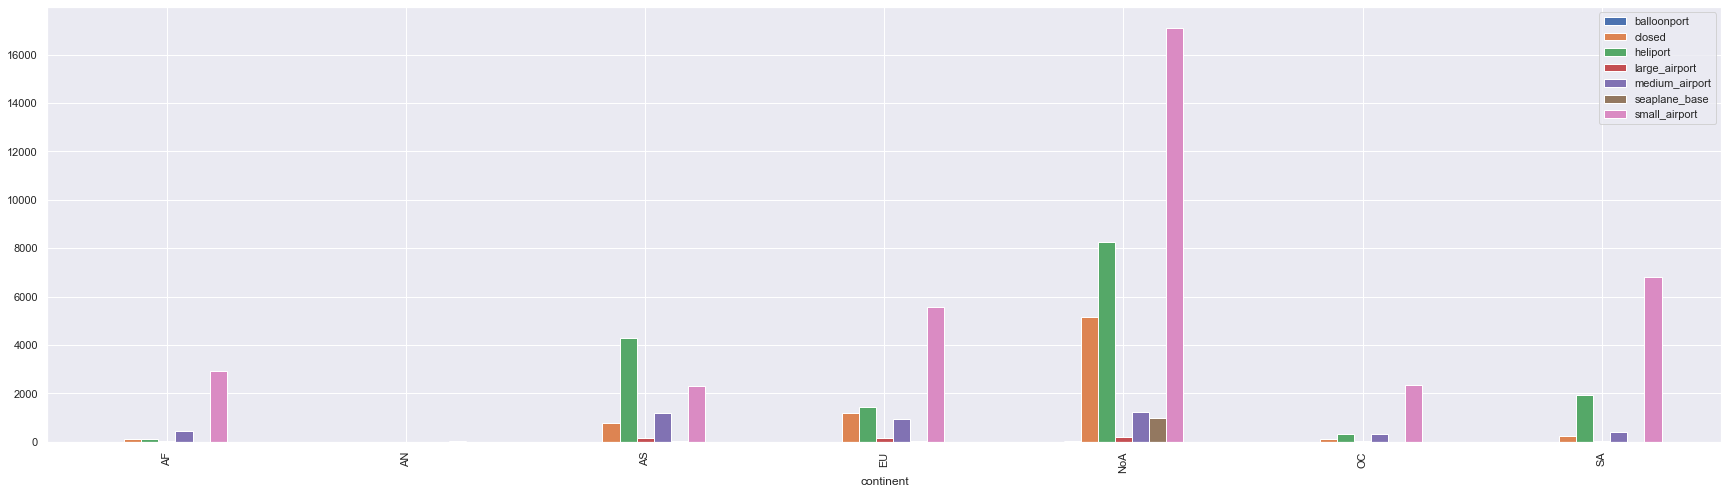

In [35]:
pivote_1.plot(kind="bar")

### 5. Indicar cuántos "large_airports" hay en el continente Europeo (EU)

In [36]:
pivote_2 = df_2[df_2["continent"] == "EU"].pivot_table(index="continent", aggfunc={"large_airport":sum})

In [37]:
pivote_2

,large_airport
continent,
EU,153


### 6. Graficar la cantidad de "small_airports" que hay en Asia por país


In [39]:
pivote_3 = df_2[df_2["continent"] == "AS"].pivot_table(index="iso_country", aggfunc={"small_airport": sum})
pivote_3

,small_airport
iso_country,
AE,20.0
AF,54.0
AM,8.0
AZ,18.0
BD,8.0
BH,1.0
BN,1.0
BT,2.0
CC,0.0


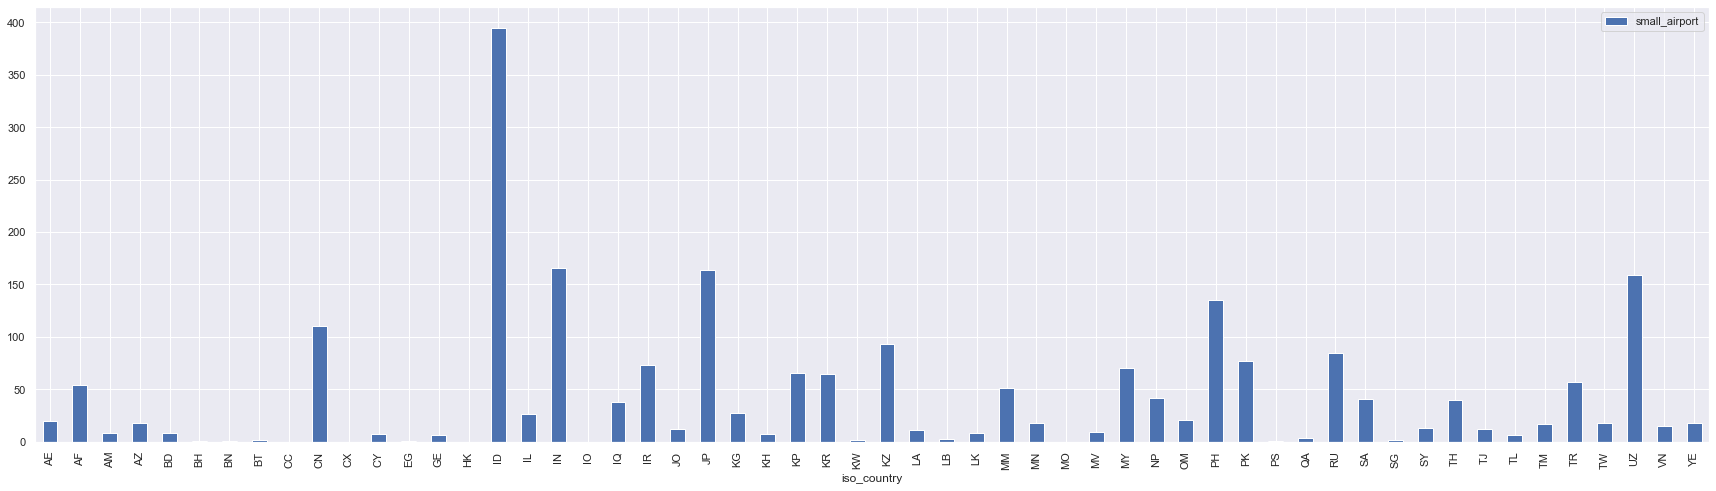

In [40]:
pivote_3.plot(kind="bar")
plt.show()

### 7. Visualizar en proporción cuántos aeropuertos tienen scheduled service y cuántos no

<AxesSubplot:ylabel='scheduled_service'>

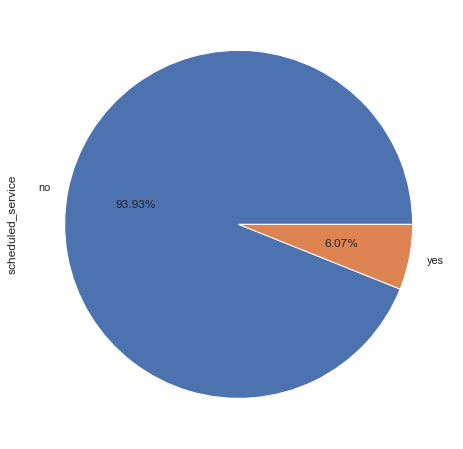

In [41]:
df["scheduled_service"].value_counts().plot(kind="pie", autopct="%1.2f%%")

Muchas veces, a lo largo de un análisis, surgen preguntas que hay que sacar de otras fuentes o bases de datos. Por lo que es normal ir abriendo datasets uy creando dataframes en base a lo que vamos necesitando.

In [50]:
df_countries = pd.read_csv("https://raw.githubusercontent.com/mdlstudioar/datosoct/main/countries")
df_countries

,id,code,name,continent,number_of_airports,number_of_medium_airports,number_of_small_airports
0,302672,AD,Andorra,EU,3.0,0.0,0.0
1,302618,AE,United Arab Emirates,AS,116.0,7.0,20.0
2,302619,AF,Afghanistan,AS,74.0,9.0,54.0
3,302722,AG,Antigua and Barbuda,NoA,4.0,1.0,2.0
4,302723,AI,Anguilla,NoA,2.0,1.0,0.0
...,...,...,...,...,...,...,...
242,302609,YT,Mayotte,AF,1.0,1.0,0.0
243,302610,ZA,South Africa,AF,837.0,67.0,702.0
244,302611,ZM,Zambia,AF,103.0,7.0,94.0
245,302612,ZW,Zimbabwe,AF,144.0,8.0,131.0


In [51]:
df_countries.isnull().sum()

id                           0
code                         0
name                         0
continent                    0
number_of_airports           0
number_of_medium_airports    0
number_of_small_airports     0
dtype: int64

### 8. Informar el número de aeropuertos por país en un mapa.

In [52]:
px.choropleth(df_countries, locations="name", 
                    locationmode='country names', color="number_of_airports", 
                    hover_name="number_of_airports", 
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title='number of airports per country'
)

### 9. Informar el número de medium airports por país en un mapa

In [53]:
px.choropleth(df_countries, locations="name", 
                    locationmode='country names', color="number_of_medium_airports", 
                    hover_name="number_of_medium_airports",
                    color_continuous_scale="Viridis",
                    title='number OF MEDIUM airports per country'
)

## ¿Qué se hace cuando se han modificado y limpiado los datos y se quiere guardar esa información?


In [54]:
from IPython.display import FileLink

# elegimos el formato, por ejemplo en CSV

df.to_csv("aeropuertos", index=False)
FileLink("aeropuertos")

/Users/magalidominguezlalli/Curso Datos Oct 2022/aeropuertos

### Muchas veces esa información la queremos guardar también lista en números

https://elmundodelosdatos.com/tecnicas-para-codificar-variables-categoricas-ordinal-one-hot/